<a href="https://colab.research.google.com/github/dmc-mcc/DSI/blob/main/stocksmodeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Phase 3 is Predictive Modeling

1. Define Nifty_Dir_Open =1/0 based on direction (dependent variable)

(already derived in phase 2)

2. Create data partition into train and test data sets (80/20)

3. Run Binary Logistic Regression with Nifty Direction as dependent variable and previous day global market returns (and VIX) as independent variables. You may add more features such as previous day High/Low ratio for Nifty 50 and/or DJI

4. Check multicollinearity and resolve if present

5. Check which variables are significant (revise the model if needed)

6. Obtain ROC curve and AUC for train data

7. Obtain threshold to balance sensitivity and specificity

Go to step 8 only if you are satisfied with model on train data

8.Obtain ROC curve and AUC for test data (compare with step 6)

9.Use above threshold to obtain sensitivity and specificity for test data

(compare with step 7)

10. Finalize the mode

In [ ]:
#importing and loading the data
from google.colab import files
uploaded = files.upload()

Saving masterdata.csv to masterdata.csv


In [ ]:
import pandas as pd
df = pd.read_csv("masterdata.csv")
df

,Date,dow_Open,dow_High,dow_Low,dow_Close,dow_AdjClose,dow_Volume,dow_return,nasdaq_Open,nasdaq_High,...,wheat_Open,wheat_High,wheat_Low,wheat_Close,wheat_AdjClose,wheat_Volume,wheat_return,month,quarter,year
0,2018-01-02,24850.449219,24941.919922,24825.550781,24922.679688,24922.679688,456790000.0,0.397478,7017.069824,7069.149902,...,435.25,437.00,432.00,436.00,436.00,70970.0,0.576701,1.0,1.0,2018.0
1,2018-01-03,24850.449219,24941.919922,24825.550781,24922.679688,24922.679688,456790000.0,0.397478,7017.069824,7069.149902,...,435.25,437.00,432.00,436.00,436.00,70970.0,0.576701,1.0,1.0,2018.0
2,2018-01-04,24964.859375,25105.960938,24963.269531,25075.130859,25075.130859,403280000.0,0.611697,7089.500000,7098.049805,...,435.75,436.00,431.00,434.00,434.00,58728.0,-0.458716,1.0,1.0,2018.0
3,2018-01-05,25114.919922,25299.789062,25112.009766,25295.869141,25295.869141,358020000.0,0.880308,7105.740234,7137.040039,...,433.00,433.75,427.50,430.75,430.75,62551.0,-0.748848,1.0,1.0,2018.0
4,2018-01-08,25308.400391,25311.990234,25235.410156,25283.000000,25283.000000,341390000.0,-0.050874,7135.379883,7161.350098,...,430.25,432.25,425.75,427.75,427.75,71822.0,-0.696460,1.0,1.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,2023-12-25,37405.898438,37617.988281,37371.828125,37545.328125,37545.328125,212420000.0,0.426255,15028.690430,15101.179688,...,615.00,639.75,611.50,636.25,636.25,40674.0,3.245436,12.0,4.0,2023.0
1560,2023-12-26,37405.898438,37617.988281,37371.828125,37545.328125,37545.328125,212420000.0,0.426255,15028.690430,15101.179688,...,615.00,639.75,611.50,636.25,636.25,40674.0,3.245436,12.0,4.0,2023.0
1561,2023-12-27,37518.621094,37683.699219,37488.601562,37656.519531,37656.519531,245530000.0,0.296152,15089.660156,15114.080078,...,636.00,637.50,619.25,623.00,623.00,38063.0,-2.082515,12.0,4.0,2023.0
1562,2023-12-28,37661.519531,37778.851562,37650.980469,37710.101562,37710.101562,199550000.0,0.142292,15142.089844,15150.070312,...,624.25,636.25,621.75,631.50,631.50,32254.0,1.364366,12.0,4.0,2023.0


In [ ]:
# Print column names as a list
print(list(df.columns))


['Date', 'dow_Open', 'dow_High', 'dow_Low', 'dow_Close', 'dow_AdjClose', 'dow_Volume', 'dow_return', 'nasdaq_Open', 'nasdaq_High', 'nasdaq_Low', 'nasdaq_Close', 'nasdaq_AdjClose', 'nasdaq_Volume', 'nasdaq_return', 'nifty_Open', 'nifty_High', 'nifty_Low', 'nifty_Close', 'nifty_AdjClose', 'nifty_Volume', 'nifty_return', 'dax_Open', 'dax_High', 'dax_Low', 'dax_Close', 'dax_AdjClose', 'dax_Volume', 'dax_return', 'hangseng_Open', 'hangseng_High', 'hangseng_Low', 'hangseng_Close', 'hangseng_AdjClose', 'hangseng_Volume', 'hangseng_return', 'nikkei_Open', 'nikkei_High', 'nikkei_Low', 'nikkei_Close', 'nikkei_AdjClose', 'nikkei_Volume', 'nikkei_return', 'vix_Open', 'vix_High', 'vix_Low', 'vix_Close', 'vix_AdjClose', 'vix_Volume', 'vix_return', 'EUR_USD_Open', 'EUR_USD_High', 'EUR_USD_Low', 'EUR_USD_Close', 'EUR_USD_AdjClose', 'EUR_USD_Volume', 'EUR_USD_return', 'GBP_USD_Open', 'GBP_USD_High', 'GBP_USD_Low', 'GBP_USD_Close', 'GBP_USD_AdjClose', 'GBP_USD_Volume', 'GBP_USD_return', 'EUR_GBP_Open', 

1. Define Nifty_Dir_Open =1/0 based on direction (dependent variable)

## I maybe having a wrong dataset coz i cant find the open direction column hence the  cell below##

In [ ]:

df['Nifty_Dir_Open'] = (df['nifty_Open'] > df['nifty_Close'].shift(1)).astype(int)


2. Create data partition into train and test data sets (80/20)

In [ ]:
from sklearn.model_selection import train_test_split

# Define the features (model)and target
model1 = ['dow_return', 'nasdaq_return', 'dax_return', 'hangseng_return', 'nikkei_return', 'vix_return','EUR_USD_return','GBP_USD_return','EUR_GBP_return','USD_JPY_return','USD_INR_return','USD_HKD_return','gold_return','silver_return','crude_return', 'wheat_return']
X = df[model1]
Y = df['Nifty_Dir_Open']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


3. Run Binary Logistic Regression with Nifty Direction as dependent variable and previous day global market returns (and VIX) as independent variables. You may add more features such as previous day High/Low ratio for Nifty 50 and/or DJI

In [ ]:
import statsmodels.api as sm

# Add a constant to the independent variables
X_train_sm = sm.add_constant(X_train)

# Fit the logistic regression model
logit_model = sm.Logit(Y_train, X_train_sm)
result = logit_model.fit()



Optimization terminated successfully.
         Current function value: 0.491603
         Iterations 8


4. Check multicollinearity and resolve if present

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["model1"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]

print(vif_data)


             model1       VIF
0        dow_return  4.456249
1     nasdaq_return  3.901107
2        dax_return  1.816905
3   hangseng_return  1.359360
4     nikkei_return  1.507235
5        vix_return  1.918402
6    EUR_USD_return  3.281181
7    GBP_USD_return  4.011901
8    EUR_GBP_return  2.107047
9    USD_JPY_return  1.312675
10   USD_INR_return  1.135840
11   USD_HKD_return  1.027703
12      gold_return  2.639775
13    silver_return  2.744310
14     crude_return  1.093091
15     wheat_return  1.037222


Comment:
No Multicollineatity present as VIF < 5


5. Check which variables are significant (revise the model if needed)

In [ ]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:         Nifty_Dir_Open   No. Observations:                 1251
Model:                          Logit   Df Residuals:                     1234
Method:                           MLE   Df Model:                           16
Date:                Tue, 04 Jun 2024   Pseudo R-squ.:                  0.1985
Time:                        23:08:32   Log-Likelihood:                -615.00
converged:                       True   LL-Null:                       -767.30
Covariance Type:            nonrobust   LLR p-value:                 2.829e-55
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.0732      0.076     14.091      0.000       0.924       1.222
dow_return          0.0639      0.122      0.522      0.601      -0.176       0.303
nasdaq_return      -0.1324      

Comment: significant variables are:


dax_return

hangseng_return

nikkei_return

USD_INR_return


6. Obtain ROC curve and AUC for train data

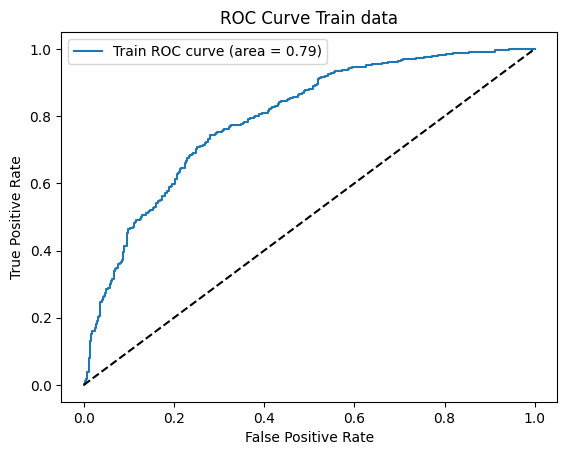

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
Y_train_pred_proba = result.predict(X_train_sm)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_train, Y_train_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Train ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Train data')
plt.legend(loc='best')
plt.show()


7. Obtain threshold to balance sensitivity and specificity

Go to step 8 only if you are satisfied with model on train data

In [ ]:

# Calculate the point where the difference between TPR and FPR is minimum
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('Optimal Threshold:', optimal_threshold)


Optimal Threshold: 0.6966880856910626


9.Use above threshold to obtain sensitivity and specificity for test data

(compare with step 7)

In [ ]:
from sklearn.metrics import confusion_matrix

# Classify predictions based on the optimal threshold
Y_train_pred_class = (Y_train_pred_proba >= optimal_threshold).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_train, Y_train_pred_class)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

Sensitivity: 0.7431192660550459
Specificity: 0.7203166226912929


In [ ]:
# Print the classification report
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

class_report = classification_report(Y_train, Y_train_pred_class)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.72      0.62       379
           1       0.86      0.74      0.80       872

    accuracy                           0.74      1251
   macro avg       0.70      0.73      0.71      1251
weighted avg       0.77      0.74      0.74      1251



8.Obtain ROC curve and AUC for test data (compare with step 6)

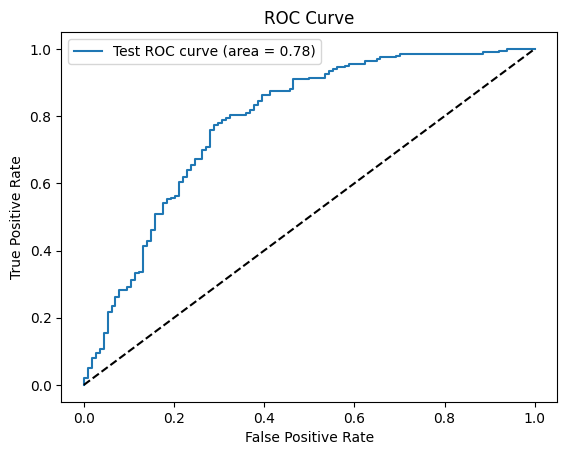

In [ ]:
X_test_sm = sm.add_constant(X_test)

# Predict probabilities
Y_test_pred_proba = result.predict(X_test_sm)

# Calculate ROC curve
fpr_test, tpr_test, thresholds_test = roc_curve(Y_test, Y_test_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Classify predictions based on the optimal threshold
Y_test_pred_class = (Y_test_pred_proba >= optimal_threshold).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_test_pred_class)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print('Sensitivity:', sensitivity)
print('Specificity:', specificity)


Sensitivity: 0.7185929648241206
Specificity: 0.7192982456140351


In [ ]:
# Print the classification report for test data


class_report = classification_report(Y_test, Y_test_pred_class)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.72      0.65       114
           1       0.82      0.72      0.76       199

    accuracy                           0.72       313
   macro avg       0.71      0.72      0.71       313
weighted avg       0.74      0.72      0.72       313



Comment:

The results for train and test data are quite close  i.e

ROC for train = 0.79 with accuracy of 74%

&

for test =0.78. and with accuracy of 72%

Model using only significant features & VIX

In [ ]:
# Define the features (model)and target
model2 = ['dax_return', 'hangseng_return', 'nikkei_return', 'vix_return','USD_INR_return']
x = df[model2]
y = df['Nifty_Dir_Open']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Add a constant to the independent variables
x_train_sm = sm.add_constant(x_train)

# Fit the logistic regression model
logit_model = sm.Logit(y_train, x_train_sm)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.497546
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         Nifty_Dir_Open   No. Observations:                 1251
Model:                          Logit   Df Residuals:                     1245
Method:                           MLE   Df Model:                            5
Date:                Tue, 04 Jun 2024   Pseudo R-squ.:                  0.1888
Time:                        22:42:47   Log-Likelihood:                -622.43
converged:                       True   LL-Null:                       -767.30
Covariance Type:            nonrobust   LLR p-value:                 1.607e-60
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.0533      0.075     14.123      0.000       0.907       1.199
dax_return    

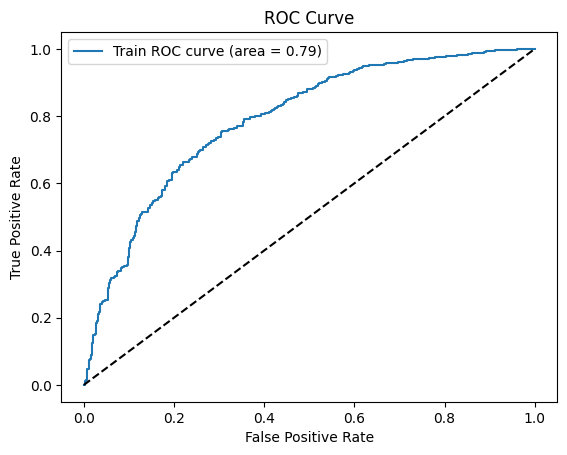

In [ ]:
# Predict probabilities
y_train_pred_proba = result.predict(x_train_sm)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Train ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
# Classify predictions based on the optimal threshold
y_train_pred_class = (y_train_pred_proba >= optimal_threshold).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred_class)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

Sensitivity: 0.7293577981651376
Specificity: 0.712401055408971


In [ ]:
class_report = classification_report(y_train, y_train_pred_class)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.71      0.61       379
           1       0.85      0.73      0.79       872

    accuracy                           0.72      1251
   macro avg       0.69      0.72      0.70      1251
weighted avg       0.76      0.72      0.73      1251



TEST DATA

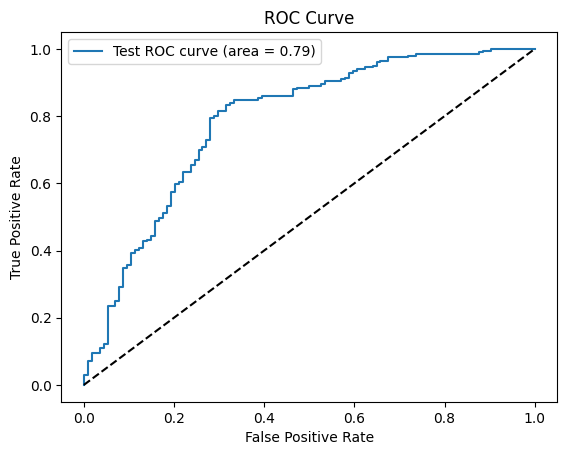

In [ ]:
x_test_sm = sm.add_constant(x_test)

# Predict probabilities
y_test_pred_proba = result.predict(x_test_sm)

# Calculate ROC curve
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


In [ ]:
# Classify predictions based on the optimal threshold
y_test_pred_class = (y_test_pred_proba >= optimal_threshold).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, y_test_pred_class)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

Sensitivity: 0.7236180904522613
Specificity: 0.7280701754385965


In [ ]:
# Print the classification report for test data


class_report = classification_report(y_test, y_test_pred_class)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.73      0.66       114
           1       0.82      0.72      0.77       199

    accuracy                           0.73       313
   macro avg       0.71      0.73      0.71       313
weighted avg       0.74      0.73      0.73       313



Comment:

The model with only sigfincant variables performs well i.e the ROC value remains the same 79% however the accuracyies differ slightly: 72% for training data and 73 % for testing data


Summary

There is a slight improvement in the model when only the significant variables
are used